### Deep Learning application to Calculate the Screen Time of Actors in any Video

In [1]:
import cv2     
import math   
import os
import matplotlib.pyplot as plt    
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   
import numpy as np    
from keras.utils import to_categorical
from skimage.transform import resize   

In [3]:
video_path = 'C:/Users/DELL/Downloads/security.avi' 
output_dir = 'C:/Users/DELL/Downloads/output_frames_1' 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frame_count = 0
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_interval = int(fps/10)  # Extract one frame per second
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_count % frame_interval == 0:
            frame_filename = os.path.join(output_dir, f'frame_{frame_count // frame_interval:01d}.jpg')
            cv2.imwrite(frame_filename, frame)
            print(f'Saved: {frame_filename}')
        
        frame_count += 1

cap.release()
print("Done extracting one frame for each second from the entire duration of the video.")


Saved: C:/Users/DELL/Downloads/output_frames_1\frame_0.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_1.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_2.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_3.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_4.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_5.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_6.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_7.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_8.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_9.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_10.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_11.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_12.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_13.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_14.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\frame_15.jpg
Saved: C:/Users/DELL/Downloads/output_frames_1\fra

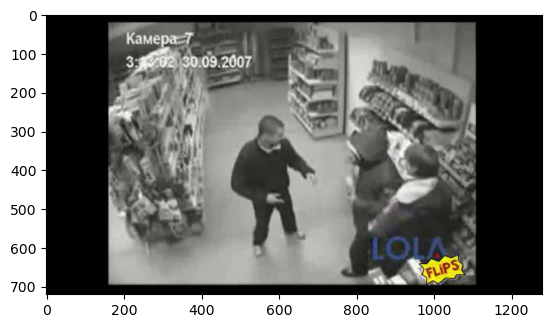

In [5]:
img = plt.imread('C:/Users/DELL/Downloads/output_frames_1/frame_0.jpg')  
plt.imshow(img)

0 – neither JERRY nor TOM
1 – for JERRY
2 – for TOM
3 - for both

In [6]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [11]:
import csv
from natsort import natsorted


folder_path = 'C:/Users/DELL/Downloads/output_frames_1'  
csv_filename = 'C:/Users/DELL/Downloads/frames_list1.csv'  

file_list = os.listdir(folder_path)

file_list = natsorted(file_list)

with open(csv_filename, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['image_frame'])  

    for file_name in file_list:
        file_name_list = file_name
        writer.writerow([file_name_list])

print(f"CSV file '{csv_filename}' created successfully with the file names sorted numerically.")


CSV file 'C:/Users/DELL/Downloads/frames_list1.csv' created successfully with the file names sorted numerically.


In [24]:
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout
from keras.utils import to_categorical
data = pd.read_csv('C:/Users/DELL/Downloads/frames_list1.csv')    
X = [ ]     
for img_name in data.image_frame:
    img = plt.imread('' + img_name)
    X.append(img)  
X = np.array(X)    

y = data.value
dummy_y = to_categorical(y) 

image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)    
    image.append(a)
X = np.array(image)

X = preprocess_input(X)   

X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    

X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
print(X_train.shape, X_valid.shape)

X_train = X_train.reshape(X_train.shape[0], 7*7*512)  
X_valid = X_valid.reshape(X_valid.shape[0], 7*7*512)

train = X_train/X_train.max()      
X_valid = X_valid/X_train.max()
model = Sequential()
model.add(InputLayer((7*7*512,)))    
model.add(Dense(units=1024, activation='sigmoid')) 
model.add(Dense(4, activation='softmax'))   

                                           image_frame  value
0    C:/Users/DELL/Downloads/output_frames_1/frame_...      0
1    C:/Users/DELL/Downloads/output_frames_1/frame_...      0
2    C:/Users/DELL/Downloads/output_frames_1/frame_...      0
3    C:/Users/DELL/Downloads/output_frames_1/frame_...      0
4    C:/Users/DELL/Downloads/output_frames_1/frame_...      0
..                                                 ...    ...
105  C:/Users/DELL/Downloads/output_frames_1/frame_...      3
106  C:/Users/DELL/Downloads/output_frames_1/frame_...      3
107  C:/Users/DELL/Downloads/output_frames_1/frame_...      3
108  C:/Users/DELL/Downloads/output_frames_1/frame_...      3
109  C:/Users/DELL/Downloads/output_frames_1/frame_...      3

[110 rows x 2 columns]
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step
(77, 7, 7, 512) (33, 7, 7, 512)


In [25]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,695,236 (98.02 MB)

 Trainable params: 25,695,236 (98.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.1846 - loss: 1.7303 - val_accuracy: 0.6667 - val_loss: 1.1992
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.8518 - loss: 0.9858 - val_accuracy: 0.7879 - val_loss: 0.9072
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.8453 - loss: 0.6815 - val_accuracy: 0.8788 - val_loss: 0.6229
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.9259 - loss: 0.4043 - val_accuracy: 0.9091 - val_loss: 0.3819
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.9714 - loss: 0.2658 - val_accuracy: 0.9697 - val_loss: 0.3119
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.9896 - loss: 0.2186 - val_accuracy: 1.0000 - val_loss: 0.2518
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.9935 - loss: 0.1749 - val_accuracy: 1.0000 - val_loss: 0.1918
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.9818 - loss: 0.1245 - val_accuracy: 1.0000 - v

### Calculating the screen time 

In [28]:
count = 0
videoFile = "C:/Users/DELL/Downloads/security.avi"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) 
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="C:/Users/DELL/Downloads/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

# Load the CSV file
test = pd.read_csv('C:/Users/DELL/Downloads/frames_list1.csv')

# Initialize list to hold images
test_image = []
for img_name in test.image_frame:
    img = plt.imread(img_name)  # Ensure img_name contains the correct full path
    if img is not None:
        test_image.append(img)
    else:
        print(f"Error loading image: {img_name}")

# Convert list to NumPy array
test_img = np.array(test_image)

# Resize each image to 224x224 (change this line if you need 91x91)
resized_images = np.array([cv2.resize(img, (224, 224)) for img in test_img])

# Flatten the resized batch
image_flat = resized_images.reshape((resized_images.shape[0], 224 * 224 * 3))  # Now this will be (110, 150528)
print("Shape of flattened image batch:", image_flat.shape)  # Should be (110, 25088)

# Predict using the model
predictions = model.predict(image_flat)


Shape of flattened image batch: (110, 150528)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (32, 150528)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 150528), dtype=uint8)
  • training=False
  • mask=None

In [30]:
test = pd.read_csv('C:/Users/DELL/Downloads/frames_list1.csv')
test_image = []
for img_name in test.image_frame:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)


In [31]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [42]:
# Resize each image to 91x91
resized_images = np.array([cv2.resize(img, (91, 91)) for img in test_image])

# Flatten the resized batch
image_flat = resized_images.reshape((110, 91 * 91 * 3))  # Now this will be (110, 25,088)
print("Shape of flattened image batch:", image_flat.shape)  # (110, 25088)

# Predict using the model
predictions = model.predict(image_flat)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4030: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'


In [77]:
predictions = np.argmax(predictions, axis=1)

In [78]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 36 seconds
The screen time of TOM is 33 seconds
